#  Кластеризация

In [9]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from time import time

In [2]:
df = pd.read_csv("datasets/fifa_players.csv")
df= df.drop(columns=['positions'])
df

,name,full_name,birth_date,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,Argentina,94,94,110500000.0,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,Denmark,88,89,69500000.0,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,France,88,91,73000000.0,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,Italy,88,88,62000000.0,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,Senegal,88,91,60000000.0,...,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,10/7/1993,25,175.26,74.8,Scotland,67,70,975000.0,...,54,69,41,60,64,63,56,40,20,18
17950,M. Sipľak,Michal Sipľak,2/2/1996,23,182.88,79.8,Slovakia,59,67,190000.0,...,22,62,55,42,39,32,52,53,64,60
17951,J. Bekkema,Jan Bekkema,4/9/1996,22,185.42,89.8,Netherlands,59,67,170000.0,...,9,27,10,5,25,16,47,9,12,13
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,Saudi Arabia,59,71,280000.0,...,58,38,15,54,52,50,53,16,18,17


In [3]:
df['potential_result'] = pd.cut(df['potential'], bins=[0, 60, 85, 100], labels=[0, 1, 2]).astype(int)
df = df.select_dtypes(include=np.number)
df = df.dropna()
df

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,potential_result
0,31,170.18,72.1,94,94,110500000.0,565000.0,5,4,4,...,48,22,94,94,75,96,33,28,26,2
1,27,154.94,76.2,88,89,69500000.0,205000.0,3,5,4,...,46,56,84,91,67,88,59,57,22,2
2,25,190.50,83.9,88,91,73000000.0,255000.0,4,4,5,...,78,64,82,88,82,87,63,67,67,2
3,27,162.56,59.0,88,88,62000000.0,165000.0,3,4,4,...,34,26,83,87,61,83,51,24,22,2
5,27,193.04,92.1,88,90,59500000.0,215000.0,3,3,2,...,82,88,41,60,62,87,90,89,84,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17940,28,172.72,76.2,91,91,93000000.0,340000.0,4,4,4,...,54,41,87,89,86,91,34,27,22,2
17941,27,154.94,69.9,91,92,102000000.0,355000.0,4,5,4,...,76,61,87,94,79,90,68,58,51,2
17942,28,193.04,76.2,91,93,72000000.0,260000.0,4,3,1,...,38,30,12,68,40,70,25,21,13,2
17943,27,175.26,68.0,92,92,108000000.0,290000.0,5,5,5,...,56,36,89,88,81,94,27,24,33,2


In [7]:
X = np.array(df.drop('potential_result', axis=1))
y = np.array(df.potential_result)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#### Кластеризация методом K-Means с тремя кластерами для набора данных Х

In [10]:
warnings.simplefilter(action='ignore', category=FutureWarning)
# настройка K-Means
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 40)
# Вычислить центры кластеров и спрогнозировать индекс кластера для каждой выборки.
y_kmeans = kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
# центры кластеров (каждая строка представляет центр одного кластера)
print(kmeans.cluster_centers_)

[[2.67817259e+01 1.76532149e+02 7.73736041e+01 7.33604061e+01
  7.63824027e+01 5.64497462e+06 2.12385787e+04 1.29780034e+00
  3.06937394e+00 2.62098139e+00 1.04270558e+07 7.46802030e+01
  1.27783418e+01 5.53722504e+01 4.96548223e+01 5.55346870e+01
  6.39780034e+01 4.76988156e+01 6.03451777e+01 5.32402707e+01
  4.73925550e+01 5.88003384e+01 6.34890017e+01 6.82013536e+01
  6.84365482e+01 6.69610829e+01 6.96412860e+01 6.52368866e+01
  6.06548223e+01 6.85059222e+01 6.88747885e+01 6.99306261e+01
  5.28324873e+01 6.19357022e+01 5.27005076e+01 5.52013536e+01
  6.07884941e+01 5.10592217e+01 6.65532995e+01 5.20575296e+01
  5.25431472e+01 4.99069374e+01]
 [2.67368421e+01 1.76329474e+02 7.67578947e+01 8.85789474e+01
  9.06842105e+01 6.93947368e+07 2.36868421e+05 3.50000000e+00
  3.65789474e+00 3.42105263e+00 1.34986842e+08 8.23684211e+01
  1.00263158e+01 6.90000000e+01 7.36842105e+01 6.37368421e+01
  7.92105263e+01 7.01315789e+01 7.79736842e+01 7.20789474e+01
  6.74473684e+01 7.32368421e+01 8.071

#### Визуализация кластеров

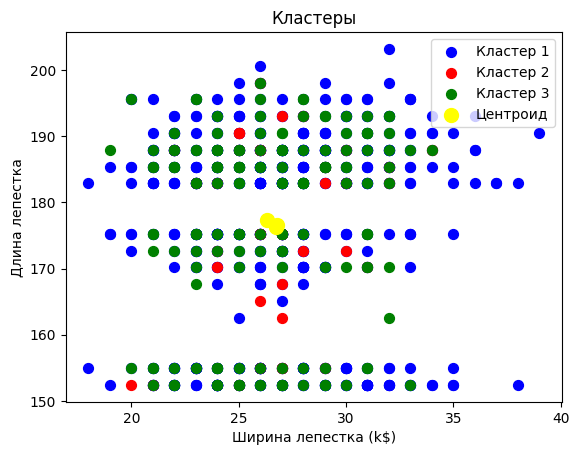

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'Кластер 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'red', label = 'Кластер 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Кластер 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label =
'Центроид')
plt.title('Кластеры')
plt.xlabel('Ширина лепестка (k$)')
plt.ylabel('Длина лепестка')
plt.legend(loc='best')
plt.show()

#### Добавили метки кластеров. Столбцы представляющие признаки и два столбца (categoria и  claster)

In [13]:
kl=kmeans.labels_.reshape(-1,1)
y_new=y.reshape(-1, 1)
z=np.hstack((X, y_new, kl))
z=DataFrame(z,columns=[
    'age',
    'height_cm',
    'weight_kgs',
    'overall_rating',
    'potential',
    'value_euro',
    'wage_euro',
    'national_rating',
    'release_clause_euro',
    'skill_moves(1-5)',
    'weak_foot(1-5)',
    'international_reputation(1-5)',
    'short_passing',
    'heading_accuracy',
    'finishing',
    'crossing',
    'national_jersey_number',
    'long_passing',
    'freekick_accuracy',
    'curve',
    'dribbling',
    'volleys',
    'reactions',
    'agility',
    'sprint_speed',
    'acceleration',
    'ball_control',
    'strength',
    'stamina',
    'jumping',
    'shot_power',
    'balance',
    'vision',
    'positioning',
    'interceptions',
    'aggression',
    'long_shots',
    'sliding_tackle',
    'standing_tackle',
    'marking',
    'composure',
    'penalties',
    'categoria',
    'claster'
])
z

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,national_rating,release_clause_euro,skill_moves(1-5),...,interceptions,aggression,long_shots,sliding_tackle,standing_tackle,marking,composure,penalties,categoria,claster
0,31.0,170.18,72.1,94.0,94.0,110500000.0,565000.0,5.0,4.0,4.0,...,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,2.0,1.0
1,27.0,154.94,76.2,88.0,89.0,69500000.0,205000.0,3.0,5.0,4.0,...,56.0,84.0,91.0,67.0,88.0,59.0,57.0,22.0,2.0,1.0
2,25.0,190.50,83.9,88.0,91.0,73000000.0,255000.0,4.0,4.0,5.0,...,64.0,82.0,88.0,82.0,87.0,63.0,67.0,67.0,2.0,1.0
3,27.0,162.56,59.0,88.0,88.0,62000000.0,165000.0,3.0,4.0,4.0,...,26.0,83.0,87.0,61.0,83.0,51.0,24.0,22.0,2.0,1.0
4,27.0,193.04,92.1,88.0,90.0,59500000.0,215000.0,3.0,3.0,2.0,...,88.0,41.0,60.0,62.0,87.0,90.0,89.0,84.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,28.0,172.72,76.2,91.0,91.0,93000000.0,340000.0,4.0,4.0,4.0,...,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,2.0,1.0
785,27.0,154.94,69.9,91.0,92.0,102000000.0,355000.0,4.0,5.0,4.0,...,61.0,87.0,94.0,79.0,90.0,68.0,58.0,51.0,2.0,1.0
786,28.0,193.04,76.2,91.0,93.0,72000000.0,260000.0,4.0,3.0,1.0,...,30.0,12.0,68.0,40.0,70.0,25.0,21.0,13.0,2.0,1.0
787,27.0,175.26,68.0,92.0,92.0,108000000.0,290000.0,5.0,5.0,5.0,...,36.0,89.0,88.0,81.0,94.0,27.0,24.0,33.0,2.0,1.0


## Расчет метрик

Оценка качества работы кластеризатора, включая различные метрики, такие как инерция, гомогенность, полнота, v-мера, скорректированная взаимная информация и коэффициент силуэта.

#### Функция для расчета метрик

In [15]:
def bench_k_means(estimator, name, data):
    # принимает кластеризатор, его название, данные
    t0 = time() # старт таймера
    estimator.fit(data) # обучаем кластеризатор
    # вычисляем метрики и отображаем их
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

Проводятся тесты для кластеризации методом K-Means, используя различные стратегии для инициализации центроидов. И воспользовались предварительной обработкой данных, масштабируя их. Результаты включают метрики качества кластеризации, такие как инерция, гомогенность, полнота, v-мера, индекс Рэнда, скорректированная взаимная информация и коэффициент силуэта.


In [16]:
data = scale(X) # предобработка, масштабируем данные, приводя к нулевому среднему и единичной дисперсии

n_samples, n_features = data.shape # число примеров и число признаков
n_digits = len(np.unique(y)) # число уникальных классов
labels = y

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

# заголовок для таблички результатов
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
# тест для k-means в котором используется улучшенный выбор начальной расстановки центроидов
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)
# тест для k-means  в котором центроиды изначально выбраны случайно из данных
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# тест для k-means  в котором начальные центроиды выбраны как главные компоненты PCA
pca = PCA(n_components=n_digits).fit(data) # вычисляем главные компоненты
bench_k_means(KMeans(init=pca.components_, # используем главные компоненты как начальные положения центроидов
                     n_clusters=n_digits, n_init=1), # здесь начальные положения центроидов не изменяются, поэтому только 1 раз делаем кластеризацию
              name="PCA-based",
              data=data)
print(82 * '_')

n_digits: 2, 	 n_samples 789, 	 n_features 42
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.14s	22121	0.002	0.002	0.002	-0.026	0.000	0.442
random   	0.26s	22121	0.002	0.002	0.002	-0.026	0.000	0.444
PCA-based	0.22s	22122	0.002	0.002	0.002	-0.027	0.001	0.425
__________________________________________________________________________________


• k-means++: Использует улучшенный выбор начальной расстановки центроидов.

• random: Начальные центроиды выбираются случайно из данных
 
• PCA-based: Использует главные компоненты как начальные положения центроидов

Метрики качества кластеризации: все три стратегии показывают схожие значения для гомогенности, полноты и v-меры, что говорит о схожести меток внутри кластеров и полноте относительно истинных классов.
Время выполнения: PCA-based быстрее, что связано с тем, что она использует только несколько главных компонентов вместо всех признаков.